In [1]:
from __future__ import division

import pandas as pd
import numpy as np
import math
from datetime import datetime, timedelta, date, time

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

In [2]:
training_traj = pd.read_csv('dataSet_phase2/trajectories(table_5)_training2.csv')
test_traj2 = pd.read_csv('dataSet_phase2/trajectories(table 5)_test2.csv')

In [3]:
training_path = 'dataSets/training/'
test_path1 = 'dataSets/testing_phase1/'

In [4]:
training_vol_old = pd.read_csv(training_path+'volume(table 6)_training.csv')
test_vol1 = pd.read_csv(test_path1+'volume(table 6)_test1.csv')

In [5]:
training_vol = pd.read_csv('dataSet_phase2/volume(table 6)_training2.csv')
test_vol2 = pd.read_csv('dataSet_phase2/volume(table 6)_test2.csv')

In [6]:
training_vol_old.columns = training_vol.columns

In [7]:
training_vol = pd.concat([training_vol_old, training_vol])

In [8]:
training_vol.head()

date_time  tollgate  direction  model  is_etc  veh_type
0  2016-09-19 23:09:25         2          0      1       0       NaN
1  2016-09-19 23:11:53         2          0      1       0       NaN
2  2016-09-19 23:13:54         2          0      1       0       NaN
3  2016-09-19 23:17:48         1          0      1       1       NaN
4  2016-09-19 23:16:07         2          0      1       0       NaN

In [9]:
def time_to_window(x):
    dt = datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
    dtmin = int(dt.minute / 20) * 20
    dtwindow = datetime(dt.year, dt.month, dt.day, dt.hour, dtmin, 0)
    return dtwindow


In [10]:
def format_window(wd):
    return '[{},{})'.format(str(wd), str(wd+timedelta(minutes=20)))

In [11]:
#training_traj['starting_datetime'] = pd.to_datetime(training_path['starting_time'])
training_traj['window'] = training_traj['starting_time'].apply(time_to_window)

training_traj_group_mean = \
training_traj.groupby(['intersection_id','tollgate_id','window']).mean()['travel_time']

training_traj_group_count = \
training_traj.groupby(['intersection_id','tollgate_id','window']).count()['travel_time']

In [12]:
training_vol['window'] = training_vol['date_time'].apply(time_to_window)

training_vol_group_count = \
training_vol.groupby(['tollgate','direction','window']).count()['date_time']


In [13]:
test_vol2['window'] = test_vol2['date_time'].apply(time_to_window)

test_vol_group_count = \
test_vol2.groupby(['tollgate','direction','window']).count()['date_time']

In [14]:
sample = pd.read_csv('/Users/yutao/Documents/Contest/tianchi/KDD_CUP2017/submission/submission_sample_volume.csv')

In [15]:
date_list2 = []

d1 = date(2016, 10, 25)  # start date
d2 = date(2016, 10, 31)  # end date

delta = d2 - d1         # timedelta

for i in range(delta.days + 1):
    date_list2.append(d1 + timedelta(days=i))





In [16]:
tiid2 = ['10']*7 + ['11']*7 + ['20']*7 + ['30']*7 + ['31']*7
dlid2 = date_list2*5

In [17]:
df_morning_test = pd.DataFrame((test_vol_group_count.values).reshape(-1,6)[::2])
df_night_test = pd.DataFrame((test_vol_group_count.values).reshape(-1,6)[1::2])

In [18]:
df_morning_test['ti'] = tiid2
df_morning_test['dl'] = dlid2
df_night_test['ti'] = tiid2
df_night_test['dl'] = dlid2

In [19]:
df_morning_test['wkwn'] = [1,1,1,1,0,0,1]*5
df_morning_test['wkwn'] *= 35

df_night_test['wkwn'] = [1,1,1,1,0,0,1]*5
df_night_test['wkwn'] *= 35

In [20]:
df_morning_test.head()

0   1   2   3   4   5  ti          dl  wkwn
0  10  17  30  25  38  44  10  2016-10-25    35
1  12   9  25  31  32  45  10  2016-10-26    35
2  14  14  23  20  36  42  10  2016-10-27    35
3   8  21  14  28  37  46  10  2016-10-28    35
4  11  17  19  27  37  24  10  2016-10-29     0

In [21]:
df_night_test.head()

0   1   2   3   4   5  ti          dl  wkwn
0  52  44  46  50  40  50  10  2016-10-25    35
1  38  36  44  49  45  46  10  2016-10-26    35
2  40  37  45  49  41  45  10  2016-10-27    35
3  62  48  57  78  67  58  10  2016-10-28    35
4  60  48  52  48  62  48  10  2016-10-29     0

In [22]:
date_list = []

d1 = date(2016, 9, 19)  # start date
d2 = date(2016, 10, 24)  # end date

delta = d2 - d1         # timedelta

for i in range(delta.days + 1):
    date_list.append(d1 + timedelta(days=i))

give_time_list1 = [time(6,0), time(6,20), time(6,40), 
                   time(7,0), time(7,20), time(7,40)]
pred_time_list1 = [time(8,0), time(8,20), time(8,40), 
                   time(9,0), time(9,20), time(9,40)]

give_time_list2 = [time(15,0), time(15,20), time(15,40), 
                   time(16,0), time(16,20), time(16,40)]
pred_time_list2 = [time(17,0), time(17,20), time(17,40), 
                   time(18,0), time(18,20), time(18,40)]

In [23]:
def interpolate_missing_window(x):
    ss = [(i-datetime(1970,1,1)).total_seconds() for i in x.index]
    tt = x.values
    ssall = np.linspace(ss[0], ss[-1], (ss[-1]-ss[0])/1200+1)
    #print(len(ss), len(tt), len(ssall))
    ttall = np.interp(ssall, ss, tt)
    ssall = [int(i) for i in ssall]
    ssall = [datetime(1970,1,1)+timedelta(seconds=i) for i in ssall]
    return pd.Series(index=ssall, data=ttall)

In [24]:
first6 = np.array([])
next6 = np.array([])
for ti, d in [(1,0), (1,1), (2,0), (3,0), (3,1)]:
    mtmp = training_vol_group_count.loc[ti, d]
    #mtmp = interpolate_missing_window(mtmp)
    test6 = []
    for i in date_list:
        tmp = []
        for j in give_time_list1:
            try:
                tmp.append(mtmp[datetime.combine(i, j)])
            except:
                tmp.append(0)
        test6.append(tmp)
    result6 = test6
    first6 = np.append(first6, result6)
    
    test6 = []
    for i in date_list:
        tmp = []
        for j in pred_time_list1:
            try:
                tmp.append(mtmp[datetime.combine(i, j)])
            except:
                tmp.append(0)
        test6.append(tmp)
    result6 = test6
    next6 = np.append(next6, result6)

morning_volume66 = np.append(first6.reshape(-1,6), next6.reshape(-1,6), axis=1)

In [25]:
tiid = ['10']*36 + ['11']*36 + ['20']*36 + ['30']*36 + ['31']*36
dlid = date_list*5

In [26]:
first6 = np.array([])
next6 = np.array([])
for ti, d in [(1,0), (1,1), (2,0), (3,0), (3,1)]:
    mtmp = training_vol_group_count.loc[ti, d]
    #mtmp = interpolate_missing_window(mtmp)
    test6 = []
    for i in date_list:
        tmp = []
        for j in give_time_list2:
            try:
                tmp.append(mtmp[datetime.combine(i, j)])
            except:
                tmp.append(0)
        test6.append(tmp)
    result6 = test6
    first6 = np.append(first6, result6)
    
    test6 = []
    for i in date_list:
        tmp = []
        for j in pred_time_list2:
            try:
                tmp.append(mtmp[datetime.combine(i, j)])
            except:
                tmp.append(0)
        test6.append(tmp)
    result6 = test6
    next6 = np.append(next6, result6)

night_volume66 = np.append(first6.reshape(-1,6), next6.reshape(-1,6), axis=1)

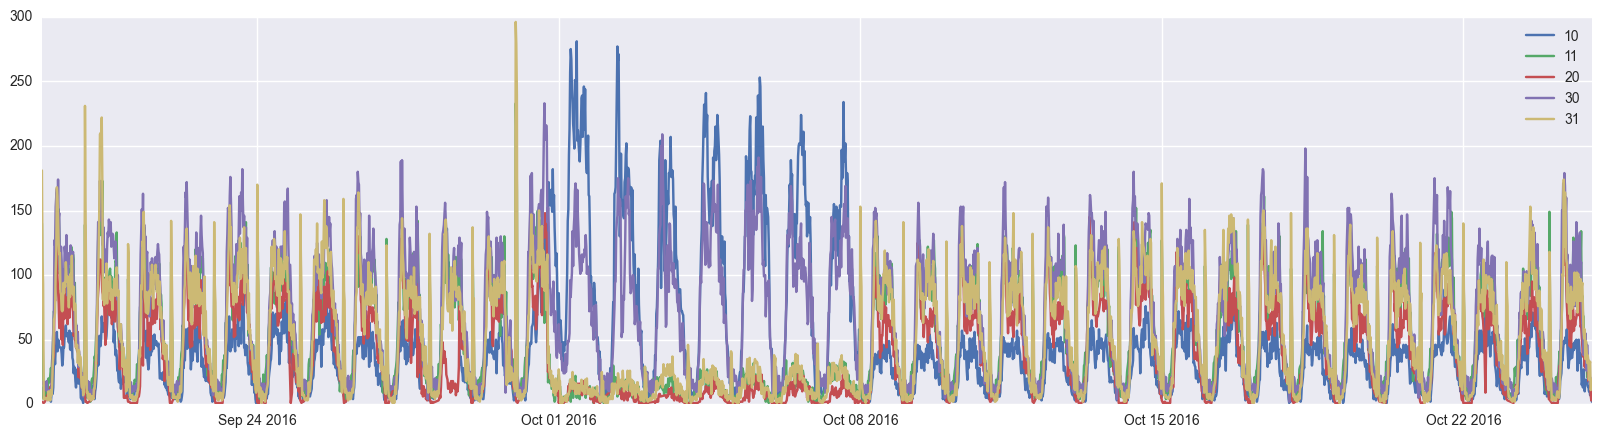

In [27]:
ttt10 = training_vol_group_count.loc[1, 0]
ttt11 = training_vol_group_count.loc[1, 1]
ttt20 = training_vol_group_count.loc[2, 0]
ttt30 = training_vol_group_count.loc[3, 0]
ttt31 = training_vol_group_count.loc[3, 1]

plt.figure(figsize=(20,5))
plt.plot(ttt10.index, ttt10)
plt.plot(ttt11.index, ttt11)
plt.plot(ttt20.index, ttt20)
plt.plot(ttt30.index, ttt30)
plt.plot(ttt31.index, ttt31)

plt.legend([10,11,20,30,31])

In [28]:
df_morning = pd.DataFrame(morning_volume66)

df_night = pd.DataFrame(night_volume66)

In [29]:
df_morning['ti'] = tiid
df_morning['dl'] = dlid
df_night['ti'] = tiid
df_night['dl'] = dlid

In [30]:
holiday_list = []

d1 = date(2016, 10, 1)  # start date
d2 = date(2016, 10, 7)  # end date

delta = d2 - d1         # timedelta

for i in range(delta.days + 1):
    holiday_list.append(d1 + timedelta(days=i))

In [31]:
df_morning2 = df_morning[~df_morning['dl'].isin(holiday_list)]
df_night2 = df_night[~df_night['dl'].isin(holiday_list)]

In [32]:
from sklearn.neighbors import KNeighborsRegressor

In [33]:
def pred_loss(x_pred, x_true):
    x_pred = np.array(x_pred).reshape(1,-1)
    x_true = np.array(x_true).reshape(1,-1)
    #print(x_true)

    return (abs(x_pred-x_true)/x_true).mean()

In [34]:
# atets = df_morning2.iloc[:,:6].values

In [35]:
# df_morning2.iloc[:,:6] = \
# np.array([np.convolve(i, [0.00,1,0.0], 'same') for i in atets])

In [36]:
df_morning2['wkwn'] = ([1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1]+[1,1,1,1,0,0,1])*5
df_morning2['wkwn'] *= 35

/Users/yutao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/yutao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [37]:
date_train = df_morning2['dl'].unique()[:-7]
df_morning2_train = df_morning2[df_morning2['dl'].isin(date_train)]
df_morning2_valid = df_morning2[~df_morning2['dl'].isin(date_train)]


In [38]:
X = df_morning2_train.iloc[:,[0,1,2,3,4,5,-1]]#.values
y = df_morning2_train.iloc[:,6:12]#.values

In [39]:
neigh = KNeighborsRegressor(n_neighbors=9, weights='distance')
neigh.fit(X, y)

pred_loss((neigh.predict(df_morning2_valid.iloc[:,[0,1,2,3,4,5,-1]])-3), 
          df_morning2_valid.iloc[:,6:12])

0.11112003991651773

In [40]:
import copy

In [41]:
# neigh_morning = copy.deepcopy(neigh)

In [42]:
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X, y)
for _ in range(3):
    y = 0.1*y + 0.9*neigh.predict(X)
    neigh.fit(X, y)
    

In [43]:
pred_loss(np.vectorize(round)(neigh.predict(df_morning2_valid.iloc[:,[0,1,2,3,4,5,-1]])-4), 
          df_morning2_valid.iloc[:,6:12])

0.1135065221579821

In [44]:
# neigh = KNeighborsRegressor(n_neighbors=12, 
#                             algorithm='brute',
#                             weights='distance',
#                             #metric=lambda a,b: wminkowski(a,b,2,wmink),
#                             #metric=lambda a, b: minkowski(a,b,2),
#                             metric= adjusted_minkowski
#                            )
# neigh.fit(X, y)
# for _ in range(0):
#     y = 0.1*y + 0.9*neigh.predict(X)
#     neigh.fit(X, y)
    

In [45]:
# X = df_morning2_train.iloc[:,[0,1,2,3,4,5,-6]]#.values
# y = df_morning2_train.iloc[:,6]#.values

In [46]:
# neigh = KNeighborsRegressor(n_neighbors=5)
# neigh.fit(X, y)
# for _ in range(3):
#     y = 0.1*y + 0.9*neigh.predict(X)
#     neigh.fit(X, y)

In [47]:
# pred_loss(np.vectorize(round)(neigh.predict(df_morning2_valid.iloc[:,[0,1,2,3,4,5,-6]])-4), 
#           df_morning2_valid.iloc[:,6])

In [48]:
X = df_morning2_train.iloc[:,[0,1,2,3,4,5,-1]]#.values
y = df_morning2_train.iloc[:,6]#.values

In [49]:
from sklearn import svm

clf = svm.SVR(C=0.1, epsilon=0.1)
clf.fit(X, y) 


SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [50]:
pred_loss(np.vectorize(round)(clf.predict(df_morning2_valid.iloc[:,[0,1,2,3,4,5,-6]])-4), 
          df_morning2_valid.iloc[:,6])

0.55543543905019932

In [51]:
clf.predict(df_morning2_valid.iloc[:,[0,1,2,3,4,5,-6]])

array([ 112.13333331,  112.13333331,  112.13333331,  112.13324212,
        112.13333331,  112.13333331,  112.13333331,  112.13333331,
        112.13333331,  112.13333331,  112.13333331,  112.13333331,
        112.13333331,  112.13333331,  112.13333331,  112.13333331,
        112.13333331,  112.13333331,  112.13333331,  112.13333331,
        112.13333331,  112.13333331,  112.13333331,  112.13333331,
        112.13333331,  112.13333331,  112.13333331,  112.13333331,
        112.13333331,  112.13333331,  112.13333331,  112.13333331,
        112.13333331,  112.13333331,  112.13333331])

In [52]:
npredm = neigh.predict(df_morning2_valid.iloc[:,[0,1,2,3,4,5,-1]])

In [53]:
ratio = (df_morning2_train.mean()[6:12])/sum(df_morning2_train.mean()[6:12])

In [54]:
ratio = np.array(ratio)

In [55]:
npredm2 = np.array([i.sum()*ratio for i in npredm])

In [56]:
pred_loss(npredm2, 
          df_morning2_valid.iloc[:,6:12])

0.12821884251394103

In [57]:
from scipy.spatial.distance import wminkowski, minkowski

In [58]:
wminkowski([1,2], [3,4], 2, [1,2])

4.4721359549995796

In [59]:
?KNeighborsRegressor

In [60]:
def adjusted_minkowski(a, b):
    dist = minkowski(a, b, 2)
    if dist > 1e-2:
        return dist
    return 1000

In [61]:
X = df_morning2_train.iloc[:,[0,1,2,3,4,5,-1]].values
y = df_morning2_train.iloc[:,6:12].values

#wmink = np.append(np.logspace(0,0,6), 1)

neigh = KNeighborsRegressor(n_neighbors=9, 
                            algorithm='brute',
                            weights='distance',
                            #metric=lambda a,b: wminkowski(a,b,2,wmink),
                            #metric=lambda a, b: minkowski(a,b,2),
                            metric= adjusted_minkowski
                           )
neigh.fit(X, y)


KNeighborsRegressor(algorithm='brute', leaf_size=30,
          metric=<function adjusted_minkowski at 0x10ac05a28>,
          metric_params=None, n_jobs=1, n_neighbors=9, p=2,
          weights='distance')

In [62]:
pred_loss(np.vectorize(round)(neigh.predict(df_morning2_valid.iloc[:,[0,1,2,3,4,5,-1]])-4), 
          df_morning2_valid.iloc[:,6:12])

0.11245335741670558

In [65]:
npred = neigh_morning.predict(df_morning2_valid.iloc[:,[0,1,2,3,4,5,-1]])
ntrue = df_morning2_valid.iloc[:,6:12].values


NameError: name 'neigh_morning' is not defined

In [66]:
ntruef = ntrue.flatten()
npredf = npred.flatten()

NameError: name 'ntrue' is not defined

In [67]:
((ntruef-npredf)**2/npredf*2/len(ntruef)).sum()

NameError: name 'ntruef' is not defined

In [68]:
# npred = neigh.predict(df_morning2_train.iloc[:,[0,1,2,3,4,5,-1]])
# ntrue = df_morning2_train.iloc[:,6:12].values

In [69]:
loss_ratio = ((ntrue-npred)/npred).flatten()
plt.hist(loss_ratio, bins=18)

NameError: name 'ntrue' is not defined

In [70]:
(loss_ratio>0.4).reshape(-1,6).sum(axis=1)

NameError: name 'loss_ratio' is not defined

In [71]:
df_morning2_valid[(loss_ratio>0.4).reshape(-1,6).sum(axis=1)>0]

NameError: name 'loss_ratio' is not defined

In [63]:
from scipy.stats import norm

In [73]:
norm.fit(loss_ratio, floc=0)

NameError: name 'loss_ratio' is not defined

In [64]:
df_night2['wkwn'] = ([1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1]+[1,1,1,1,0,0,1])*5
df_night2['wkwn'] *= 35

/Users/yutao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/yutao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [65]:
date_train = df_night2['dl'].unique()[:-7]
df_night2_train = df_night2[df_night2['dl'].isin(date_train)]
df_night2_valid = df_night2[~df_night2['dl'].isin(date_train)]

In [66]:
df_night2_train = df_night2_train.drop(9)

In [67]:
df_night2_train = df_night2_train.drop(83)

In [68]:
X = df_night2_train.iloc[:,[0,1,2,3,4,5,-1]]#.values
y = df_night2_train.iloc[:,6:12]#.values

neigh = KNeighborsRegressor(n_neighbors=12, weights='distance')
neigh.fit(X, y) 


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=12, p=2,
          weights='distance')

In [69]:
pred_loss((neigh.predict(df_night2_valid.iloc[:,[0,1,2,3,4,5,-1]])-5), 
          df_night2_valid.iloc[:,6:12])


0.15062460697628188

In [70]:
X = df_night2_train.iloc[:,[0,1,2,3,4,5,-1]]#.values
y = df_night2_train.iloc[:,11]#.values

neigh = KNeighborsRegressor(n_neighbors=12, weights='distance')
neigh.fit(X, y) 
pred_loss((neigh.predict(df_night2_valid.iloc[:,[0,1,2,3,4,5,-1]]))-5, 
          df_night2_valid.iloc[:,11])

0.20962742513223701

In [71]:
for i in range(6,12):
    X = df_night2_train.iloc[:,[0,1,2,3,4,5,-1]]#.values
    y = df_night2_train.iloc[:,i]#.values

    neigh = KNeighborsRegressor(n_neighbors=12, weights='distance')
    neigh.fit(X, y) 
    print \
    pred_loss((neigh.predict(df_night2_valid.iloc[:,[0,1,2,3,4,5,-1]]))-5, 
              df_night2_valid.iloc[:,i])
    
    

0.114750695214
0.135174884783
0.157584985015
0.135836799842
0.150772851871
0.209627425132


In [72]:
for i in range(6,12):
    X = df_night2_train.iloc[:,[0,1,2,3,4,5,-1]]#.values
    y = df_night2_train.iloc[:,i]#.values
    k = -0.4
    wmink = np.append(np.logspace(k,0,6), np.logspace(k,0,6).mean())

    neigh = KNeighborsRegressor(n_neighbors=12, 
                                algorithm='brute',
                                weights='distance',
                                metric=lambda a,b: wminkowski(a,b,2,wmink))
    neigh.fit(X, y) 
    print \
    pred_loss((neigh.predict(df_night2_valid.iloc[:,[0,1,2,3,4,5,-1]]))-5, 
              df_night2_valid.iloc[:,i])
    
    

0.103359000306
0.137611091604
0.147724332135
0.131821936411
0.140406726232
0.203126280549


In [268]:
X = df_night2_train.iloc[:,[0,1,2,3,4,5,-1]]#.values

Xv = df_night2_valid.iloc[:,[0,1,2,3,4,5,-1]]


y = df_night2_train.iloc[:,6:12]#.values
k = -0.4
wmink = np.append(np.logspace(k,0,6), np.logspace(k,0,6).mean())

neigh = KNeighborsRegressor(n_neighbors=12, 
                            algorithm='brute',
                            weights=lambda x: 1/(x**0),
                            metric=lambda a,b: wminkowski(a,b,2,wmink))
neigh.fit(X, y) 


KNeighborsRegressor(algorithm='brute', leaf_size=30,
          metric=<function <lambda> at 0x10b982488>, metric_params=None,
          n_jobs=1, n_neighbors=12, p=2,
          weights=<function <lambda> at 0x10b982500>)

In [269]:
print \
pred_loss((neigh.predict(Xv))-5, 
          df_night2_valid.iloc[:,6:12])

0.144148284017


In [75]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [109]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel,WhiteKernel

In [207]:
X = df_night2_train.iloc[:,[0,1,2,3,4,5,-1]]#.values

Xv = df_night2_valid.iloc[:,[0,1,2,3,4,5,-1]]


y = df_night2_train.iloc[:,6]#.values

kernel = 1* RBF(length_scale=1.0, length_scale_bounds=(1e-3, 1e3)) \
    + WhiteKernel(noise_level=10, noise_level_bounds=(1e-10, 1e10))
gauss = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gauss.fit(X, y)


GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=10),
             n_restarts_optimizer=10, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [208]:
print \
pred_loss((gauss.predict(Xv))-5, df_night2_valid.iloc[:,6])

0.121212546843


In [489]:
def weight_func(x):
    lc = 10
    ths = 15
    if x.max()<ths:
        return 1/x
    elif np.partition(x, lc)[lc]<ths:
        return np.array([1/i if i<=ths else 0 for i in x])
    else:
        #print np.array([[1/i if i<=np.partition(x[0], lc)[lc] else 0 for i in x[0]]])
        return np.array([1/i if i<=np.partition(x, lc)[lc] else 0 for i in x])

In [490]:
def weight_func2(x):
    #print x
    return np.array([weight_func(i) for i in x])

In [628]:
X = df_night2_train.iloc[:,[0,1,2,3,4,5,-1]]#.values
y = df_night2_train.iloc[:,6:12]#.values

k = -0.4
wmink = np.append(np.logspace(k,0,6), np.logspace(k,0,6).mean())

neigh = KNeighborsRegressor(n_neighbors=20, 
                            algorithm='brute',
                            weights=weight_func2,
                            metric=lambda a,b: wminkowski(a,b,2,wmink))
neigh.fit(X, y) 


KNeighborsRegressor(algorithm='brute', leaf_size=30,
          metric=<function <lambda> at 0x10be5e1b8>, metric_params=None,
          n_jobs=1, n_neighbors=20, p=2,
          weights=<function weight_func2 at 0x10bdec230>)

In [629]:
print \
pred_loss((neigh.predict(df_night2_valid.iloc[:,[0,1,2,3,4,5,-1]]))-5, 
          df_night2_valid.iloc[:,6:12])

0.143783528658


In [251]:
neigh.kneighbors(df_night2_valid.iloc[4,[0,1,2,3,4,5,-1]])

/Users/yutao/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


(array([[ 16.07211494,  25.2823953 ,  25.68727451,  26.24738763,
          26.61664244,  27.07212171,  27.29166149,  27.75646441,
          28.42168032,  28.5876139 ,  29.16590051,  29.36190992,
          29.67587932,  30.21477843,  31.15265666]]),
 array([[18,  7,  8,  0,  2, 15, 16,  5,  9,  6,  3, 14, 19, 20,  1]]))

In [361]:
xx = np.array([1,5,2,7,8,9,3,4,0])
np.partition(xx, -5)[-5]

4

In [365]:
[1/i if i>=2 else 0 for i in [1,2,3]]

[0, 0.5, 0.3333333333333333]

# Outlier in test data, use some outliers in national days as proxy training data

In [278]:
df_morning_test.loc[[19,20]]

0   1   2   3   4   5  ti          dl  wkwn
19   5   3   6   6  11  16  20  2016-10-30     0
20  10  10  14  37  42  58  20  2016-10-31    35

In [279]:
df_night_test.loc[[19,20]]

0   1   2   3   4   5  ti          dl  wkwn
19  13  25  26  13  27  19  20  2016-10-30     0
20  13  17  13  19  12  17  20  2016-10-31    35

In [280]:
df_morning_least = df_morning[df_morning['dl'].isin(holiday_list)][df_morning['ti'].isin(['11','20','31'])]

/Users/yutao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [281]:
df_night_least = df_night[df_night['dl'].isin(holiday_list)][df_night['ti'].isin(['11','20','31'])]

/Users/yutao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [282]:
df_night_least2 = df_night_least[df_night_least.iloc[:,:6].sum(axis=1)>70]

In [283]:
df_night_least2.mean()

0     19.588235
1     19.470588
2     20.235294
3     17.411765
4     16.588235
5     16.529412
6     12.294118
7     14.470588
8     12.823529
9     11.588235
10    11.294118
11     8.647059
dtype: float64

In [284]:
df_night_least_pred = \
np.array([np.array(df_night_least2.iloc[:,:6].sum(axis=1) / df_night_least2.mean()[:6].sum()) \
 * i for i in np.array(df_night_least2.mean()[6:12])]).T

In [285]:
pred_loss(df_night_least_pred-1, df_night_least2.iloc[:,6:12])

0.29358450514150003

In [286]:
df_ratio_least = np.array(df_night_least2.mean()[6:12]) / df_night_least2.mean()[:6].sum()
df_ratio_least

array([ 0.1119443 ,  0.13176219,  0.11676486,  0.10551687,  0.10283878,
        0.07873594])

In [287]:
df_ratio_least[0] = df_ratio_least[1] = df_ratio_least[:2].mean()

In [288]:
adjusted19 = df_night_test.iloc[19, :6].sum() * df_ratio_least - 1
adjusted20 = df_night_test.iloc[20, :6].sum() * df_ratio_least - 1

# Remove outliers

/Users/yutao/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


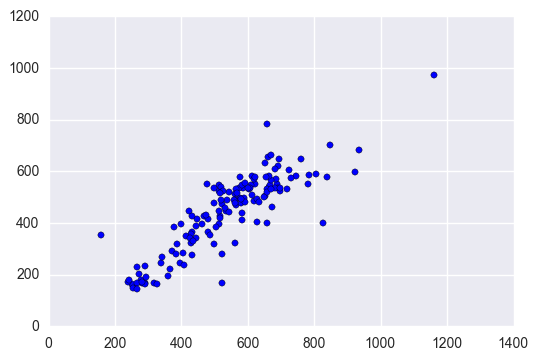

In [87]:
plt.scatter(df_night2.iloc[:,:6].sum(axis=1), df_night2.iloc[:,6:12].sum(axis=1))

In [88]:
df_night2[(df_night2.iloc[:,:6].sum(axis=1)>400)&(df_night2.iloc[:,6:12].sum(axis=1)<200)]

0     1     2      3     4     5     6     7     8     9    10    11  \
9  91.0  97.0  88.0  105.0  97.0  45.0  31.0  37.0  31.0  26.0  24.0  18.0   

   ti          dl  wkwn  
9  10  2016-09-28    35

In [89]:
df_night2[(df_night2.iloc[:,:6].sum(axis=1)>800)&(df_night2.iloc[:,6:12].sum(axis=1)<420)]

0      1      2      3      4      5      6      7     8     9    10  \
83  138.0  133.0  135.0  129.0  148.0  143.0  131.0  133.0  52.0  25.0  32.0   

      11  ti          dl  wkwn  
83  27.0  20  2016-09-30    35

In [90]:
df_night2[(df_night2.iloc[:,:6].sum(axis=1)<200)&(df_night2.iloc[:,6:12].sum(axis=1)>220)]

0     1     2     3     4     5     6     7     8     9    10    11  \
81  11.0  15.0  10.0  18.0  29.0  76.0  56.0  79.0  69.0  43.0  54.0  52.0   

    ti          dl  wkwn  
81  20  2016-09-28    35

In [91]:
dm = df_night2_train.mean()[:12]

In [92]:
rn = np.array(df_night2_valid.iloc[:,:6].sum(axis=1)/dm[:6].sum())

In [93]:
pn = np.array([i*np.array(dm[6:12]) for i in rn])

In [94]:
pred_loss(pn-5, df_night2_valid.iloc[:,6:12])

0.17802639520849733

# Model for Night!

In [501]:
X = df_night2.iloc[:,[0,1,2,3,4,5,-1]]#.values
y = df_night2.iloc[:,6:12]#.values
X.drop([9,83])
y.drop([9,83])

k = -0.4
wmink = np.append(np.logspace(k,0,6), np.logspace(k,0,6).mean())

neigh = KNeighborsRegressor(n_neighbors=12, 
                            algorithm='brute',
                            weights='distance',
                            metric=lambda a,b: wminkowski(a,b,2,wmink))
neigh.fit(X, y) 
neigh_night_all = copy.deepcopy(neigh)


In [96]:
weight_result = []
for k in np.linspace(-0.8,0,41):

    X = df_night2_train.iloc[:,[0,1,2,3,4,5,-1]]#.values
    y = df_night2_train.iloc[:,6:12]#.values

    wmink = np.append(np.logspace(k,0,6), np.logspace(k,0,6).mean())

    neigh = KNeighborsRegressor(n_neighbors=12, 
                                algorithm='brute',
                                weights='distance',
                                metric=lambda a,b: wminkowski(a,b,2,wmink))
    neigh.fit(X, y)

    loss = \
    pred_loss((neigh.predict(df_night2_valid.iloc[:,[0,1,2,3,4,5,-1]]))-5, 
          df_night2_valid.iloc[:,6:12])
    weight_result.append(([k, loss]))

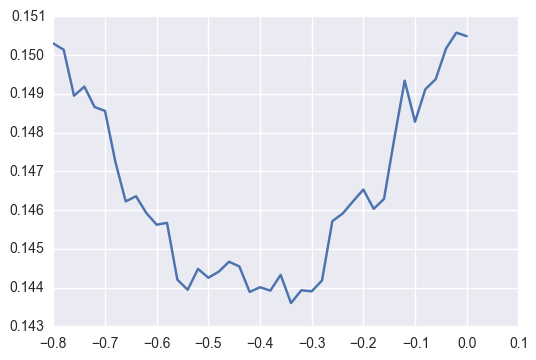

In [97]:
plt.plot([i[0] for i in weight_result], [i[1] for i in weight_result])

In [464]:
k = -0.4
X = df_night2_train.iloc[:,[0,1,2,3,4,5,-1]]#.values
y = df_night2_train.iloc[:,6:12]#.values

wmink = np.append(np.logspace(k,0,6), np.logspace(k,0,6).mean())

neigh = KNeighborsRegressor(n_neighbors=12, 
                            algorithm='brute',
                            weights='distance',
                            metric=lambda a,b: wminkowski(a,b,2,wmink))
neigh.fit(X, y)

loss = \
pred_loss((neigh.predict(df_night2_valid.iloc[:,[0,1,2,3,4,5,-1]]))-5, 
      df_night2_valid.iloc[:,6:12])
weight_result.append(([k, loss]))

In [465]:
pred_loss((neigh.predict(df_night2_valid.iloc[:,[0,1,2,3,4,5,-1]]))-5, 
          df_night2_valid.iloc[:,6:12])

0.14400822787283304

In [223]:
pred_loss(np.vectorize(round)(neigh.predict(df_night2_valid.iloc[:,[0,1,2,3,4,5,-1]]))-5, 
          df_night2_valid.iloc[:,6:12])

0.14332312498368247

In [344]:
neigh_night = copy.deepcopy(neigh)

In [345]:
pred_loss((neigh_night.predict(df_night2_valid.iloc[:,[0,1,2,3,4,5,-1]]))-5, 
          df_night2_valid.iloc[:,6:12])

0.14400822787283304

In [521]:
pred_loss((neigh_morning.predict(df_morning2_valid.iloc[:,[0,1,2,3,4,5,-1]]))-2, 
          df_morning2_valid.iloc[:,6:12])

NameError: name 'neigh_morning' is not defined

In [316]:
neigh_morning.kneighbors(df_morning2_valid.iloc[34,[0,1,2,3,4,5,-1]])

/Users/yutao/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


(array([[ 18.60107524,  18.89444363,  20.14944168,  20.59126028,
          21.07130751,  21.70253441,  21.86321111,  22.64950331,
          23.70653918]]),
 array([[ 48,  34,  37,  24,  62, 109,  55,  45,  57]]))

In [315]:
?neigh_morning.kneighbors

In [302]:
df_morning2_train.iloc[:,:6].sum(axis=1).sort_values().iloc[:5]

10    116.0
20    118.0
6     123.0
27    123.0
19    124.0
dtype: float64

In [303]:
df_morning2_valid.iloc[:,:6].sum(axis=1).sort_values().iloc[:5]

34     102.0
33     112.0
31     139.0
30     146.0
106    150.0
dtype: float64

In [525]:
npred = neigh_night.predict(df_night2_valid.iloc[:,[0,1,2,3,4,5,-1]])
ntrue = df_night2_valid.iloc[:,6:12].values

In [538]:
((npred-ntrue)/ntrue).sum(axis=1).reshape(5,7)

array([[ 0.78522024,  0.20143545,  0.44158199,  0.95595654,  1.20693121,
         1.4668315 ,  2.17778315],
       [ 1.12093509, -0.44729458,  0.1893305 , -0.72917915,  0.94492375,
         0.13277878, -0.48846122],
       [ 0.49054349, -0.99531158,  1.249482  ,  0.94306756,  1.46553707,
        -0.15648272,  1.1302546 ],
       [ 0.64965047,  0.05985812,  0.53278963,  0.13143711,  0.59057663,
         0.45156159,  0.64625081],
       [ 0.4803627 ,  0.2065571 ,  0.65983697,  0.82119064,  0.48339385,
         0.16410021, -0.2911715 ]])

In [526]:
npredf = npred.flatten()
ntruef = ntrue.flatten()

In [527]:
((ntruef-npredf)**2/npredf*2/len(ntruef)).sum()

4.1770619248814533

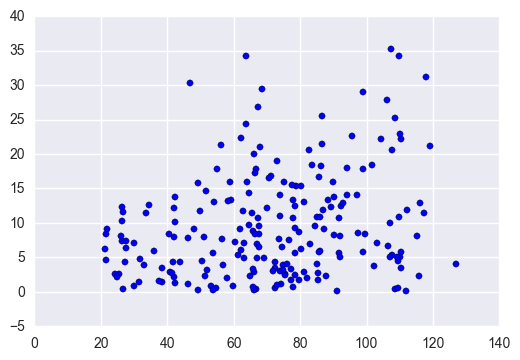

In [528]:
plt.scatter(npred.flatten(), np.abs(ntrue-npred).flatten())

(array([  3.,   5.,   9.,  16.,  20.,  34.,  27.,  30.,  28.,   9.,  11.,
          8.,   4.,   2.,   2.,   0.,   1.,   1.]),
 array([-0.46734337, -0.40542391, -0.34350445, -0.28158498, -0.21966552,
        -0.15774606, -0.09582659, -0.03390713,  0.02801233,  0.08993179,
         0.15185126,  0.21377072,  0.27569018,  0.33760965,  0.39952911,
         0.46144857,  0.52336803,  0.5852875 ,  0.64720696]),
 <a list of 18 Patch objects>)

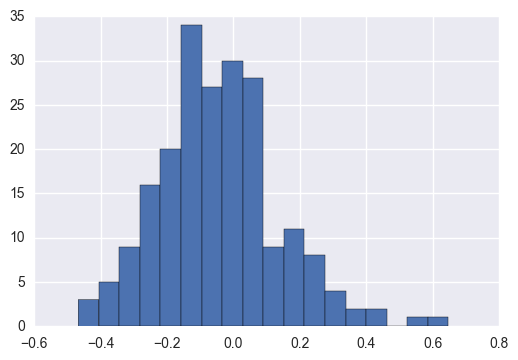

In [529]:
loss_ratio = ((ntrue-npred)/npred).flatten()
plt.hist(loss_ratio, bins=18)

In [530]:
norm.fit(loss_ratio, floc=0)

(0, 0.18570650614259099)

In [582]:
def change_time_window(x):
    for i in range(18, 25):
        iold = str(i)
        inew = str(i+7)
        x = x.replace('10-'+iold, '10-'+inew)
    return x

In [583]:
sample['time_window'] = sample['time_window'].apply(change_time_window)

In [186]:
# daily_mean = df_night2.mean()[:12]

# adjusted19 = np.array(df_night_test.iloc[19,:6].sum() / daily_mean[:6].sum() * daily_mean[6:12])
# adjusted20 = np.array(df_night_test.iloc[20,:6].sum() / daily_mean[:6].sum() * daily_mean[6:12])

In [636]:
def wfunc(x):
    if x==0:
        return 0
    return 1/x

In [663]:
X = df_night2.iloc[:,[0,1,2,3,4,5,-1]]#.values
y = df_night2.iloc[:,6:12]#.values
X = X.drop([9,77,83])
y = y.drop([9,77,83])

k = -0.4
wmink = np.append(np.logspace(k,0,6), np.logspace(k,0,6).mean())

neigh = KNeighborsRegressor(n_neighbors=12, 
                            algorithm='brute',
                            weights=lambda x: [[wfunc(i) for i in j] for j in x],
                            metric=lambda a,b: wminkowski(a,b,2,wmink))
neigh.fit(X, y) 


KNeighborsRegressor(algorithm='brute', leaf_size=30,
          metric=<function <lambda> at 0x10bfad230>, metric_params=None,
          n_jobs=1, n_neighbors=12, p=2,
          weights=<function <lambda> at 0x10bfad1b8>)

In [664]:
pred_loss((neigh.predict(X)-5), y)

0.18422465765405197

In [643]:
y.min()

6     29.0
7     21.0
8     16.0
9     15.0
10     0.0
11     1.0
dtype: float64

In [632]:
X = df_night2.iloc[:,[0,1,2,3,4,5,-1]]#.values
y = df_night2.iloc[:,6:12]#.values
X = X.drop([9,77,83])
y = y.drop([9,77,83])

k = -0.4
wmink = np.append(np.logspace(k,0,6), np.logspace(k,0,6).mean())

neigh = KNeighborsRegressor(n_neighbors=12, 
                            algorithm='brute',
                            weights='distance',
                            metric=lambda a,b: wminkowski(a,b,2,wmink))
neigh.fit(X, y) 
neigh_night_all = copy.deepcopy(neigh)



In [668]:
df_night2.loc[77]

0               80
1               89
2               94
3               87
4               83
5               89
6               71
7               89
8               85
9               34
10               0
11               1
ti              20
dl      2016-09-24
wkwn             0
Name: 77, dtype: object

In [669]:
night_pred = neigh_night_all.predict(df_night_test.iloc[:,[0,1,2,3,4,5,-1]])-5

In [670]:
neigh_night_all.predict(df_night_test.iloc[24, [0,1,2,3,4,5,-1]])

/Users/yutao/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 126.96180859,  115.64879765,  112.92358408,   90.49715306,
          91.29694495,   72.53716191]])

In [671]:
neigh_night_all.kneighbors(df_night_test.iloc[:,[0,1,2,3,4,5,-1]])[0][:,-1]

array([ 15.83748321,  13.86285218,  14.92042988,  25.49284618,
        28.8654451 ,  34.72161759,  14.40456861,  19.36047174,
        15.04323   ,  17.21668161,  25.05042987,  31.18542235,
        29.60874267,  17.82146604,  22.82740638,  20.63850658,
        22.61276695,  19.41861636,  26.26816859,  52.78388688,
        56.94649034,  31.47523201,  27.4061537 ,  22.00924581,
        63.68397977,  37.75016907,  38.72806648,  21.06839349,
        17.40971271,  27.42608729,  20.8455901 ,  24.26710918,
        28.28905574,  43.78404883,  21.08777435])

In [672]:
X24neigh = X.iloc[neigh_night_all.kneighbors(df_night_test.iloc[:,[0,1,2,3,4,5,-1]])[1][24],:-1]

In [673]:
d24neigh = 1/neigh_night_all.kneighbors(df_night_test.iloc[:,[0,1,2,3,4,5,-1]])[0][24]

In [674]:
sum1 = (sum([X24neigh.values[i] * d24neigh[i] for i in range(12)])/d24neigh.sum()).sum()
sum1

747.53444957672173

In [675]:
sum2 = df_night_test.iloc[24,:6].sum()
sum2

926

In [676]:
night_pred[24]

array([ 121.96180859,  110.64879765,  107.92358408,   85.49715306,
         86.29694495,   67.53716191])

In [677]:
night_pred[24] = (night_pred[24]+5) * sum2 / sum1 - 5

In [678]:
night_pred[24]

array([ 152.27253082,  138.25866411,  134.88283606,  107.10234362,
        108.09307695,   84.85460398])

In [681]:
night_pred[19] = adjusted19
night_pred[20] = adjusted20

In [682]:
night_pred = np.transpose(night_pred.reshape(5,7,6), axes=(0,2,1)).reshape(1,-1)[0]

In [610]:
df_night2.iloc[:,:6].sum(axis=1).sort_values().iloc[:5]

81    159.0
30    239.0
31    242.0
20    252.0
21    253.0
dtype: float64

In [611]:
df_night_test.iloc[:,:6].sum(axis=1).sort_values().iloc[:5]

20     91
19    123
2     257
1     258
0     282
dtype: int64

In [612]:
df_night2.iloc[:,:6].sum(axis=1).sort_values().iloc[-5:]

133     837.0
113     847.0
140     924.0
112     934.0
119    1162.0
dtype: float64

In [613]:
df_night_test.iloc[:,:6].sum(axis=1).sort_values().iloc[-5:]

5     743
21    757
33    785
26    814
24    926
dtype: int64

In [683]:
import pickle

In [684]:
morn_pred = pickle.load(open('morn_pred1.p', 'rb'))

In [685]:
len(np.append(morn_pred, night_pred))

420

In [686]:
sample['volume'] = np.vectorize(round)(np.append(morn_pred, night_pred))

In [687]:
sample[(sample['tollgate_id']==2) & (sample['direction']==0) & (sample['time_window']=='[2016-10-30 18:40:00,2016-10-30 19:00:00)')]


tollgate_id                                time_window  direction  volume
334            2  [2016-10-30 18:40:00,2016-10-30 19:00:00)          0     9.0

In [688]:
sample.to_csv('submission/submission_0601v.csv', index=False)

In [689]:
sub30 = pd.read_csv('submission/submission_0601v.csv')
sub31 = pd.read_csv('submission/submission_0531v.csv')

In [690]:
sub30['volume_new'] = sub31['volume']

In [691]:
sub30['dif'] = (sub30['volume_new'] - sub30['volume'] ).apply(np.abs)

In [692]:
subsort = sub30.sort_values(by='dif', ascending=False)

In [696]:
subsort

tollgate_id                                time_window  direction  \
353            3  [2016-10-28 17:40:00,2016-10-28 18:00:00)          0   
339            3  [2016-10-28 17:00:00,2016-10-28 17:20:00)          0   
360            3  [2016-10-28 18:00:00,2016-10-28 18:20:00)          0   
367            3  [2016-10-28 18:20:00,2016-10-28 18:40:00)          0   
346            3  [2016-10-28 17:20:00,2016-10-28 17:40:00)          0   
374            3  [2016-10-28 18:40:00,2016-10-28 19:00:00)          0   
74             1  [2016-10-29 09:20:00,2016-10-29 09:40:00)          1   
46             1  [2016-10-29 08:00:00,2016-10-29 08:20:00)          1   
357            3  [2016-10-25 18:00:00,2016-10-25 18:20:00)          0   
187            3  [2016-10-30 08:40:00,2016-10-30 09:00:00)          1   
49             1  [2016-10-25 08:20:00,2016-10-25 08:40:00)          1   
364            3  [2016-10-25 18:20:00,2016-10-25 18:40:00)          0   
78             1  [2016-10-26 09:40:00,2016-10-26 10:00:00)          1   
198            3  [2016-10-27 09:20:00,2016-10-27 09:40:00)          1   
101            2  [2016-10-28 08:40:00,2016-10-28 09:00:00)          0   
173            3  [2016-10-30 08:00:00,2016-10-30 08:20:00)          1   
72             1  [2016-10-27 09:20:00,2016-10-27 09:40:00)          1   
140            3  [2016-10-25 08:40:00,2016-10-25 09:00:00)          0   
119            2  [2016-10-25 09:40:00,2016-10-25 10:00:00)          0   
208            3  [2016-10-30 09:40:00,2016-10-30 10:00:00)          1   
201            3  [2016-10-30 09:20:00,2016-10-30 09:40:00)          1   
58             1  [2016-10-27 08:40:00,2016-10-27 09:00:00)          1   
60             1  [2016-10-29 08:40:00,2016-10-29 09:00:00)          1   
115            2  [2016-10-28 09:20:00,2016-10-28 09:40:00)          0   
113            2  [2016-10-26 09:20:00,2016-10-26 09:40:00)          0   
112            2  [2016-10-25 09:20:00,2016-10-25 09:40:00)          0   
75             1  [2016-10-30 09:20:00,2016-10-30 09:40:00)          1   
36             1  [2016-10-26 09:40:00,2016-10-26 10:00:00)          0   
180            3  [2016-10-30 08:20:00,2016-10-30 08:40:00)          1   
178            3  [2016-10-28 08:20:00,2016-10-28 08:40:00)          1   
..           ...                                        ...        ...   
268            1  [2016-10-27 17:40:00,2016-10-27 18:00:00)          1   
267            1  [2016-10-26 17:40:00,2016-10-26 18:00:00)          1   
252            1  [2016-10-25 17:00:00,2016-10-25 17:20:00)          1   
240            1  [2016-10-27 18:20:00,2016-10-27 18:40:00)          0   
241            1  [2016-10-28 18:20:00,2016-10-28 18:40:00)          0   
242            1  [2016-10-29 18:20:00,2016-10-29 18:40:00)          0   
243            1  [2016-10-30 18:20:00,2016-10-30 18:40:00)          0   
244            1  [2016-10-31 18:20:00,2016-10-31 18:40:00)          0   
245            1  [2016-10-25 18:40:00,2016-10-25 19:00:00)          0   
246            1  [2016-10-26 18:40:00,2016-10-26 19:00:00)          0   
247            1  [2016-10-27 18:40:00,2016-10-27 19:00:00)          0   
248            1  [2016-10-28 18:40:00,2016-10-28 19:00:00)          0   
249            1  [2016-10-29 18:40:00,2016-10-29 19:00:00)          0   
250            1  [2016-10-30 18:40:00,2016-10-30 19:00:00)          0   
251            1  [2016-10-31 18:40:00,2016-10-31 19:00:00)          0   
253            1  [2016-10-26 17:00:00,2016-10-26 17:20:00)          1   
266            1  [2016-10-25 17:40:00,2016-10-25 18:00:00)          1   
254            1  [2016-10-27 17:00:00,2016-10-27 17:20:00)          1   
255            1  [2016-10-28 17:00:00,2016-10-28 17:20:00)          1   
256            1  [2016-10-29 17:00:00,2016-10-29 17:20:00)          1   
257            1  [2016-10-30 17:00:00,2016-10-30 17:20:00)          1   
258            1  [2016-10-31 17:00:00,2016-10-31 17:20:00)          1   
259      

In [218]:
(subsort['dif']/subsort['volume_new']).iloc[:10].sum()/420

0.004064502882011287

In [559]:
len(subsort)

420

In [70]:
training_weather = pd.read_csv('weather (table 7)_training_update.csv')

In [539]:
test_weather = pd.read_csv('dataSet_phase2/weather (table 7)_2.csv')

In [80]:
training_weather['datetime'] = \
    [datetime(int(i[:4]), int(i[5:7]), int(i[8:10]), j) for i, j in \
         zip(training_weather['date'], training_weather['hour'])]

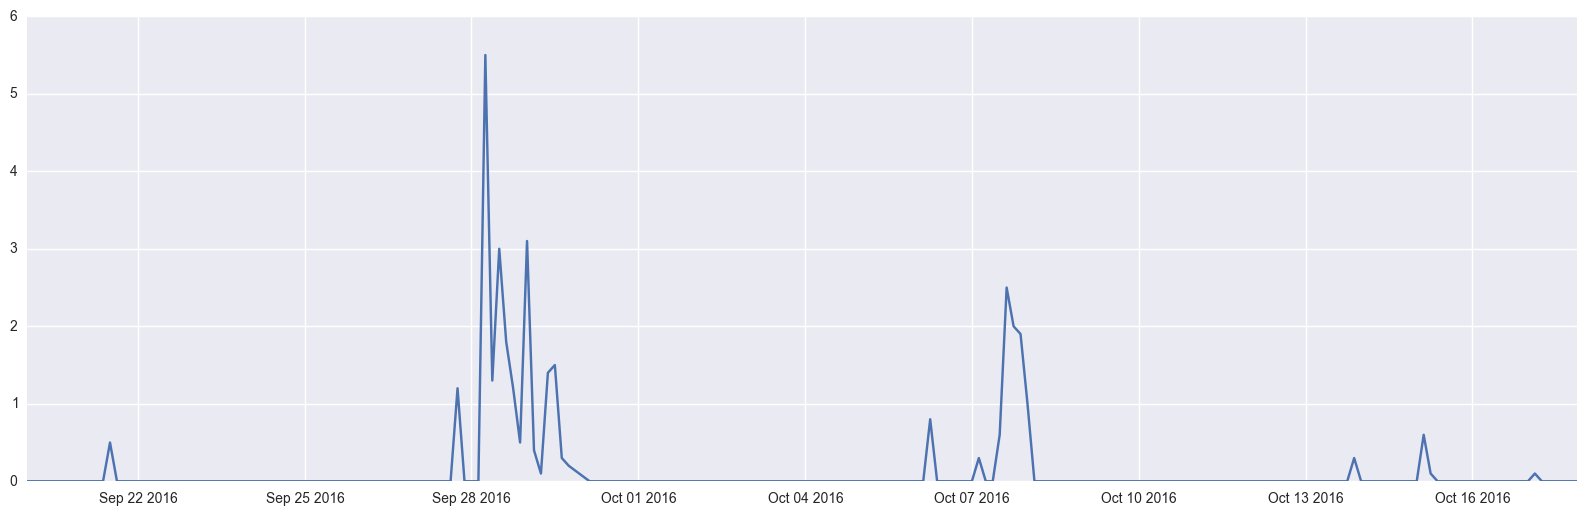

In [94]:
wt = training_weather.iloc[648:]

plt.figure(figsize=(20,6))
plt.plot(wt['datetime'], wt['precipitation'])

# Self-written KNN

In [239]:
class KNeighborsRegressor_M():
    def __init__(self, n_neighbors=5, weights='uniform', 
                 distance_weights=None):
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.distance_weights = distance_weights

        
    def fit(self, X, y):
        self._fit_X = X
        self._fit_y = y
    
    @staticmethod
    def distance_metric(m, n, dw):
        m = np.array(m)
        n = np.array(n)
        if dw != None:
            try:
                return np.sqrt(((m-n)**2*np.array(dw)).sum())
            except:
                raise ValueError('Check distance_weights')
        return np.sqrt(((m-n)**2).sum())
    
    def distance_matrix(self, X1, X2):
        dmatrix = \
            [[KNeighborsRegressor_M.distance_metric(
                        i, j, self.distance_weights) 
              for i in X1] for j in X2]
        dmatrix = np.array(dmatrix)
        return dmatrix
    
    def predict(self, X):
        _dmatrix = self.distance_matrix(self._fit_X, X)
        nn = min(self.n_neighbors, self._fit_X.shape[0])
        nn_dist_matrix = np.array([np.partition(i, 2)[:2] for i in _dmatrix])
        nn_arg_matrix = np.array([np.argpartition(i, 2)[:2] for i in _dmatrix])
        
        
        return None
    
    
    

In [244]:
dm = KNeighborsRegressor_M(distance_weights=None).distance_matrix(X1, X2)
dm

array([[ 5.        ,  3.60555128,  5.65685425,  4.12310563],
       [ 5.        ,  2.23606798,  2.        ,  3.60555128],
       [ 3.16227766,  1.41421356,  1.        ,  2.        ]])

In [235]:
np.array([np.partition(i, 2)[:2] for i in dm])

array([[ 3.60555128,  4.12310563],
       [ 2.        ,  2.23606798],
       [ 1.        ,  1.41421356]])

In [234]:
[np.argpartition(i, 2)[:2] for i in dm]

[array([1, 3]), array([2, 1]), array([2, 1])]

In [229]:
np.argpartition(test, 4)[:4]

array([9, 1, 6, 2])

In [230]:
np.partition(test, 4)[:4]

array([0, 1, 1, 3])

In [231]:
?np.partition